# Image Search Engine with CNN using Keras

# Task 1: Import Libraries

In [1]:
import tensorflow as tf
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Convolution2D,BatchNormalization
from keras.layers import MaxPooling2D,Dropout
from keras.layers import Flatten
from keras.layers import Dense
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import img_to_array
import random
from keras.preprocessing import image

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', False if tf.config.list_physical_devices('GPU') == [] else True)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# print(tf.config.list_physical_devices('GPU'))

TensorFlow version: 2.8.0
Is using GPU? False
Num GPUs Available:  0


# Importing Dataset

In [2]:
class Dataset(object):
    def __init__(self, data_path):
        self.data_path = data_path
        assert os.path.exists(self.data_path), 'Insert a valid path!'

        # get class list
        self.data_classes = os.listdir(self.data_path)

        # init mapping dict
        self.data_mapping = {}

        # populate mapping dict
        for c, c_name in enumerate(self.data_classes):
            temp_path = os.path.join(self.data_path, c_name)
            temp_images = os.listdir(temp_path)

            for i in temp_images:
                img_tmp = os.path.join(temp_path, i)

                if img_tmp.lower().endswith(('.jpg', '.jpeg')):
                    if c_name == 'distractor':
                        self.data_mapping[img_tmp] = -1
                    else:
                        self.data_mapping[img_tmp] = c_name

        print('Loaded {:d} from {:s} images'.format(len(self.data_mapping.keys()),
                                                    self.data_path))

    def get_data_paths(self):
        # returns a list of imgpaths and related classes
        images = []
        classes = []
        for img_path in self.data_mapping.keys():
            if img_path.lower().endswith(('.jpg', '.jpeg')):
                images.append(img_path)
                classes.append(self.data_mapping[img_path])
        return images, np.array(classes)


    def num_classes(self):
        # returns number of classes of the dataset
        return len(self.data_classes)

# Task 2: Preprocess Data

In [3]:
# we get data_path
# data_path = '/content/drive/MyDrive/ML/dataset'
data_path = 'dataset_rahin'
# we define training_path
training_path = os.path.join(data_path, 'training')

# we define validation path, query and gallery
validation_path = os.path.join(data_path, 'validation')
gallery_path = os.path.join(validation_path, 'gallery')
query_path = os.path.join(validation_path, 'query')

In [4]:
training_dataset = Dataset(data_path=training_path)
gallery_dataset = Dataset(data_path=gallery_path)
query_dataset = Dataset(data_path=query_path)

Loaded 47986 from dataset_rahin\training images
Loaded 295 from dataset_rahin\validation\gallery images
Loaded 26 from dataset_rahin\validation\query images


In [5]:
"""Importing the data folder and giving a shuffle"""
dataset=[]
labels=[]
random.seed(420)
imagePaths = sorted(list(os.listdir("dataset_rahin/training")))
random.shuffle(imagePaths)

In [6]:
for images in imagePaths:
    path=sorted(list(os.listdir("dataset_rahin/training/"+images)))
    for i in path:
        try:
            image = cv2.imread("dataset_rahin/training/"+images+'/'+i) #using opencv to read image
#             print(images, ": ", i, ": ", image.shape)
#             image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            image = cv2.resize(image, (128,128)) 
#             image = img_to_array(image) #converting image info to array
            dataset.append(image)

            l = label = images
            labels.append(l)
    #         print(l)
        except:
            print("Error with loading and resizing image", " ", images, ": ", i)
            #code to move to next frame

In [7]:
"""Converting to numpay array"""
dataset = np.array(dataset, dtype="float32") / 255.0
labels = np.array(labels)

"""Here we are using LabelBinarizer to scale data because it does not need data in integer encoded form first to convert into its respective encoding"""
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
"""Splitting dataset into train and test"""

x_train,x_test,y_train,y_test=train_test_split(dataset,labels,test_size=0.3,random_state=420)

In [ ]:
# print(y_train)

In [ ]:
# y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
# y_train = tf.keras.utils.to_categorical(y_train)
# y_train2 = tf.keras.utils.to_categorical(np.asarray(y_train.factorize()[0]))

In [ ]:
# def get_three_classes(x, y):
#     indices_0, _ = np.where(y == 0.)
#     indices_1, _ = np.where(y == 1.)
#     indices_2, _ = np.where(y == 2.)

#     indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
#     x = x[indices]
#     y = y[indices]
    
#     count = x.shape[0]
#     indices = np.random.choice(range(count), count, replace=False)
    
#     x = x[indices]
#     y = y[indices]
    
#     y = tf.keras.utils.to_categorical(y)
    
#     return x, y

In [9]:
# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Train whole set:")
print(x_train.shape, y_train.shape)
print("Test whole set:")
print(x_test.shape, y_test.shape)

# x_train2, y_train2 = get_three_classes(x_train, y_train)
# x_test2, y_test2 = get_three_classes(x_test, y_test)
# print("Train subset:")
# print(x_train2.shape, y_train2.shape)
# print("Test subset:")
# print(x_test2.shape, y_test2.shape)

Train whole set:
(33625, 128, 128, 3) (33625, 98)
Test whole set:
(14412, 128, 128, 3) (14412, 98)


# Task 3: Visualize Examples

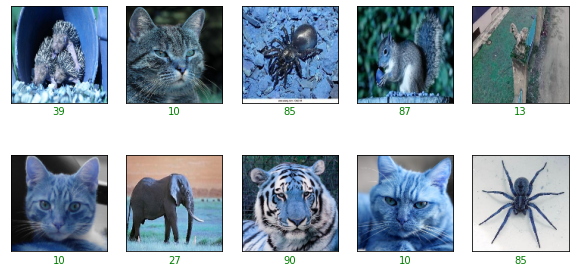

In [10]:
# class_names = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, 1 + i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(np.argmax(p[i]), color=col)
    plt.show()
    
show_random_examples(x_train, y_train, y_train)

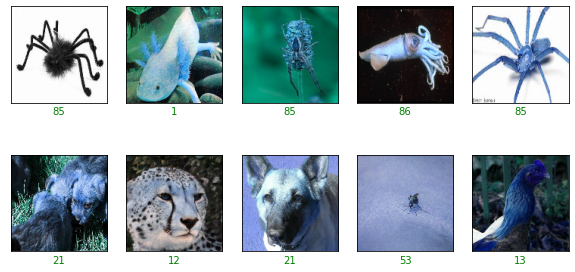

In [11]:
show_random_examples(x_test, y_test, y_test)

# Task 4: Create Model

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation='relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation='relu'))
        model.add(MaxPooling2D(pool_size=2))
#         model.add(Dropout(0.5))
        return model

    model = tf.keras.models.Sequential()
    model.add(Input(shape=(128, 128,3)))
    
    model = add_conv_block(model, 32)
    model = add_conv_block(model, 64)
    model = add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(98, activation='softmax'))
    
    model.compile(
        loss='categorical_crossentropy',
        optimizer='adam', metrics=['accuracy']
    )
    return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 63, 63, 64)       2

# Task 5: Train the Model

In [13]:
h = model.fit(
    x_train/255., y_train,
    validation_data=(x_test/255., y_test),
    epochs=10, batch_size=128,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
        tf.keras.callbacks.ModelCheckpoint(
            'models/model_{val_accuracy:.3f}.h5',
            save_best_only=True, save_weights_only=False,
            monitor='val_accuracy'
        )
    ]
)

Epoch 1/10
263/263 [==============================] - 700s 3s/step - loss: 2.3128 - accuracy: 0.4152 - val_loss: 4.5806 - val_accuracy: 0.1007
Epoch 2/10
263/263 [==============================] - 659s 3s/step - loss: 1.3365 - accuracy: 0.6471 - val_loss: 4.0562 - val_accuracy: 0.0404
Epoch 3/10
263/263 [==============================] - 657s 2s/step - loss: 0.7821 - accuracy: 0.7688 - val_loss: 3.1803 - val_accuracy: 0.2289
Epoch 4/10
263/263 [==============================] - 656s 2s/step - loss: 0.4418 - accuracy: 0.8623 - val_loss: 1.8398 - val_accuracy: 0.6173
Epoch 5/10
263/263 [==============================] - 657s 2s/step - loss: 0.2670 - accuracy: 0.9143 - val_loss: 4.0880 - val_accuracy: 0.5194
Epoch 6/10
263/263 [==============================] - 655s 2s/step - loss: 0.1537 - accuracy: 0.9517 - val_loss: 2.4359 - val_accuracy: 0.6348
Epoch 7/10
263/263 [==============================] - 658s 3s/step - loss: 0.0886 - accuracy: 0.9749 - val_loss: 2.2544 - val_accuracy: 0.6392

# Task 6: Final Predictions

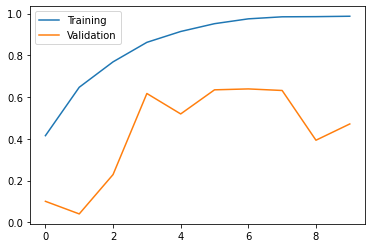

In [14]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)), accs, label='Training')
plt.plot(range(len(accs)), val_accs, label='Validation')
plt.legend()
plt.show()

In [15]:
model= tf.keras.models.load_model('models/model_0.639.h5')

In [16]:
preds = model.predict(x_test/255.)

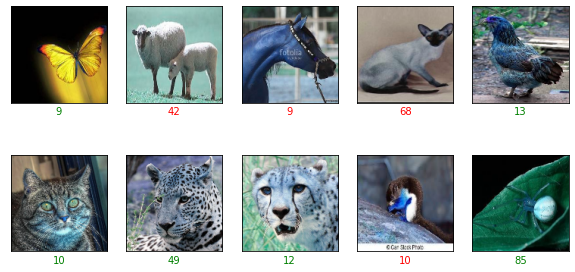

In [19]:
show_random_examples(x_test, y_test, preds)